In [3]:
%load_ext autoreload
%autoreload 2

from gninvert.nn import GeneralLinearFullNet
import torch as t
import math
import matplotlib.pyplot as plt
from gninvert.hyperparamsearch import hpsearch
from gninvert.data_generation import TrainingData

import numpy as np
import networkx as nx
from gninvert.hyperparamsearch import get_hyperparam_dtree
from gninvert.dtree import variance, approx_equal_gen, decision_tree_paths, dtree_to_networkx, draw_dtree


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
results = t.load('models/bighpsearch')

NOTE: the above file is too large to sensibly host on Git (~60MiB), therefore it will not exist if you got this from the GitHub repository. It can be replicated by training for several hours on a decent CPU with the `nn_tests` notebook

In [6]:
dtree = get_hyperparam_dtree(
    results,
    eq_threshold = 13
)
dtree

<<<DTREE on <ATTRIBUTE loss_func taking values (MSELoss(), L1Loss())
  --(MSELoss())-->
  <<<DTREE on <ATTRIBUTE optimizer taking values ('adam', 'sgd')
    --(adam)-->
    <<<DTREE on <ATTRIBUTE regularization_coefficient taking values (False, 1e-05, 0.001)
      --(False)-->
      <<<DTREE on <ATTRIBUTE 5 taking values (False, True)
        --(False)-->
        <LEAF -10.033804365696714>
        --(True)-->
        <<<DTREE on <ATTRIBUTE 4 taking values (<class 'torch.nn.modules.activation.GELU'>, <class 'torch.nn.modules.activation.Sigmoid'>)
          --(<class 'torch.nn.modules.activation.GELU'>)-->
          <<<DTREE on <ATTRIBUTE 3 taking values ([32, 32], [8, 8, 8], [32], [128], [8, 8], [128, 128], [8])
            --((32, 32))-->
            <LEAF -11.175343247056796>
            --((8, 8, 8))-->
            <LEAF -11.528252043512715>
            --((32,))-->
            <LEAF -11.185134022098241>
            --((128,))-->
            <LEAF -5.724183883138526>
            --((

In [8]:
decision_tree_paths(dtree)

[[('loss_func', MSELoss()),
  ('optimizer', 'adam'),
  ('regularization_coefficient', False),
  (5, True),
  (4, torch.nn.modules.activation.GELU),
  (3, (8, 8, 8)),
  -11.528252043512715],
 [('loss_func', MSELoss()),
  ('optimizer', 'adam'),
  ('regularization_coefficient', False),
  (5, True),
  (4, torch.nn.modules.activation.GELU),
  (3, (32,)),
  -11.185134022098241],
 [('loss_func', MSELoss()),
  ('optimizer', 'adam'),
  ('regularization_coefficient', False),
  (5, True),
  (4, torch.nn.modules.activation.GELU),
  (3, (32, 32)),
  -11.175343247056796],
 [('loss_func', MSELoss()),
  ('optimizer', 'adam'),
  ('regularization_coefficient', False),
  (5, True),
  (4, torch.nn.modules.activation.GELU),
  (3, (8, 8)),
  -10.745523530465398],
 [('loss_func', MSELoss()),
  ('optimizer', 'adam'),
  ('regularization_coefficient', False),
  (5, True),
  (4, torch.nn.modules.activation.GELU),
  (3, (8,)),
  -10.11597149223852],
 [('loss_func', MSELoss()),
  ('optimizer', 'adam'),
  ('regular

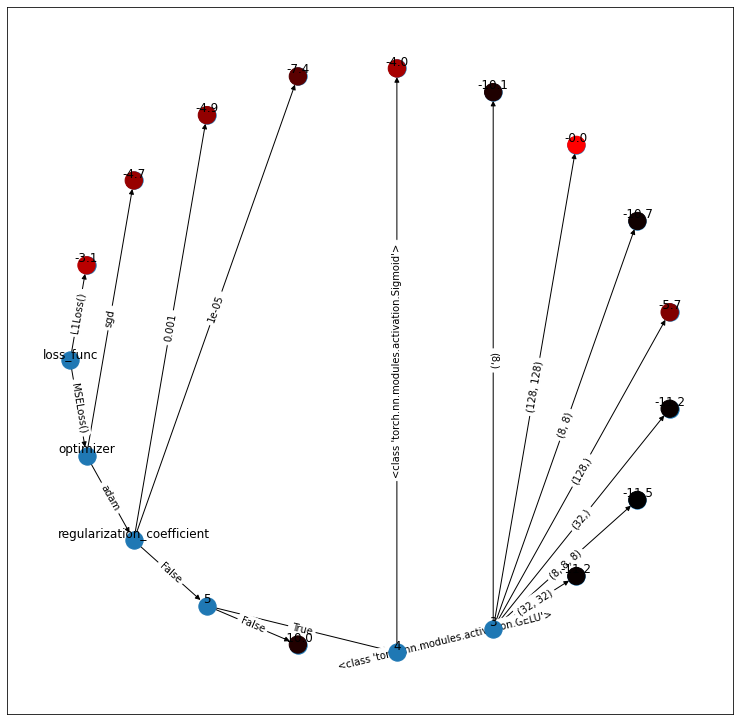

In [7]:
nxg = dtree_to_networkx(dtree)
plt.rcParams['figure.figsize'] = [13, 13]
draw_dtree(dtree)